In [85]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
cd /content/drive/MyDrive/'Colab Notebooks'/'yai_9기 겨울방학'/ToyProject

/content/drive/MyDrive/Colab Notebooks/yai_9기 겨울방학/ToyProject


In [88]:
csv = pd.read_csv('final.csv')

In [89]:
csv.head()

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Length,Width,Depth,Price
0,111000-5962,CUSHION,1.01,I2,FANCY,EX,VG,VG,N,5.89,5.63,3.53,1155.27
1,111000-6281,CUSHION,1.19,I2,FANCY,EX,VG,GD,M,5.97,5.59,3.80,3638.36
2,111000-6305,OVAL,1.00,SI2,U-V,EX,EX,VG,M,8.47,5.39,3.42,2237.73
3,111000-6320,PEAR,1.01,SI2,E,EX,VG,VG,N,9.39,5.52,3.24,2953.85
4,111000-6368,CUSHION,1.01,SI2,FANCY,VG,VG,GD,ST,6.10,5.36,3.48,2241.67


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


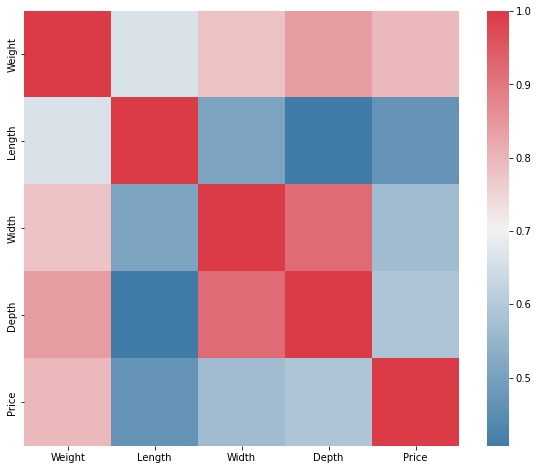

In [90]:
f, ax = plt.subplots(figsize=(10, 8))
corr = csv.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

전체 데이터에 대해 cor에 대한 heatmap을 그려보면 큰 상관관계가 보이지 않습니다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


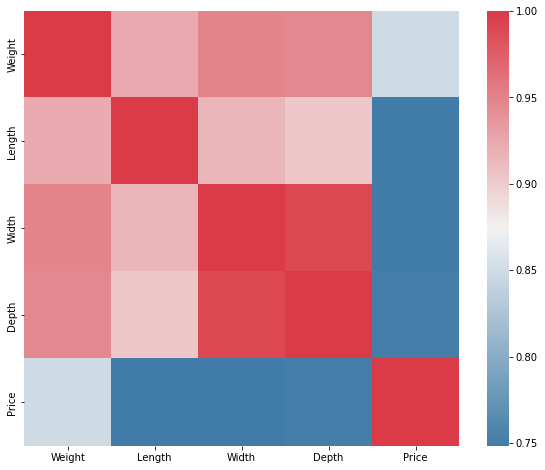

In [91]:
csv_cushion = csv[csv.Shape == 'CUSHION']
f, ax = plt.subplots(figsize=(10, 8))
corr = csv_cushion.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

보석 별로 corr을 구해보니 상관관계가 조금 더 뚜렷하게 보입니다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


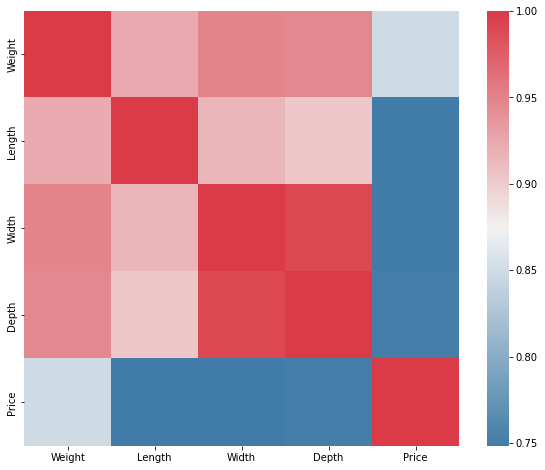

In [92]:
csv_heart = csv[csv.Shape == 'CUSHION']
f, ax = plt.subplots(figsize=(10, 8))
corr = csv_heart.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


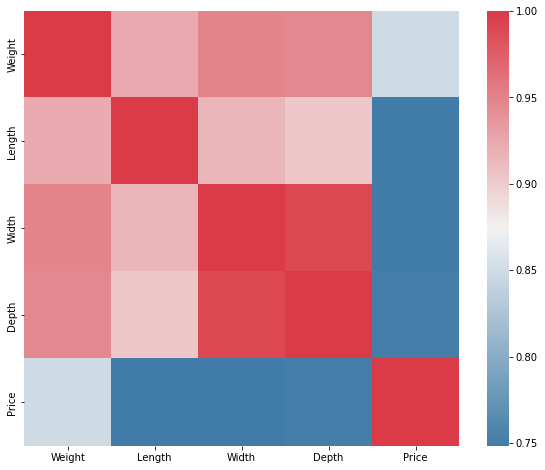

In [93]:
csv_marquise = csv[csv.Shape == 'CUSHION']
f, ax = plt.subplots(figsize=(10, 8))
corr = csv_marquise.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

In [94]:
csv_cushion = csv[csv.Shape == 'CUSHION']

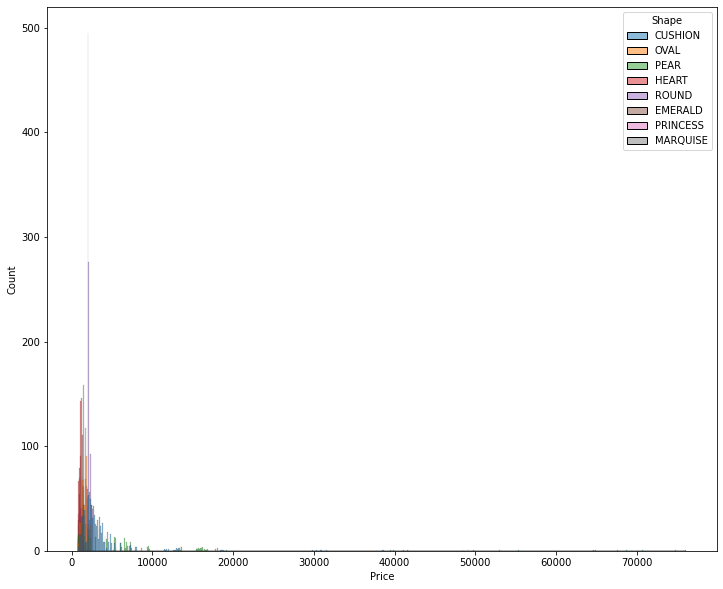

In [95]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.histplot(x='Price', data=csv, hue = 'Shape')

가격에 따른 histogram을 그렸는데 데이터가 불균형한 것을 알 수 있습니다.

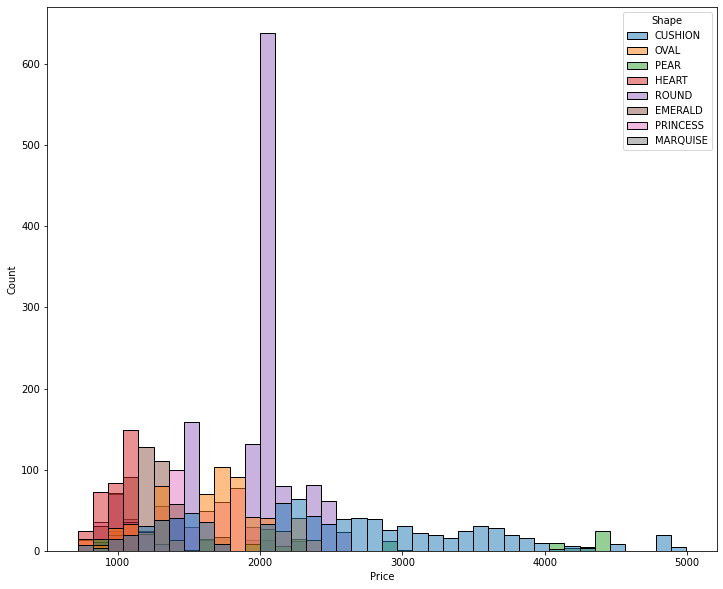

In [96]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.histplot(x='Price', data=csv[csv.Price < 5000], hue = 'Shape')

ROUND가 너무 많아서 모델이 ROUND에 fitting되면 테스트셋의 가격을 2000정도로 동일하게 예상해도 metric이 높게 나올 것 같습니다. metric의 신뢰도가 떨어지는 문제

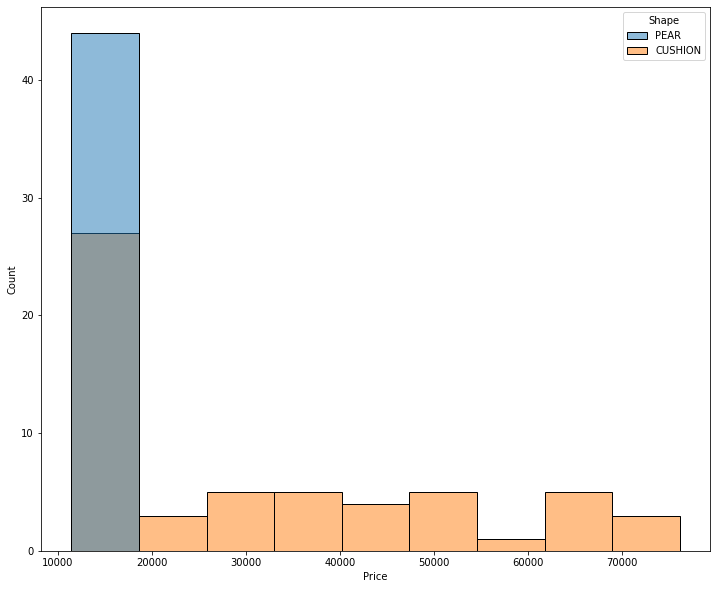

In [97]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.histplot(x='Price', data=csv[csv.Price > 10000], hue = 'Shape')

price가 10000 이상인 값들이 이하인 값들에 비해 매우 적고, 특정 보석에 치중돼있습니다. dataset을 train과 validation으로 분할할 때, random으로 분할하지 않고 값은 균등히 분배해야할 것 같습니다. 

In [98]:
print("최소 price와 최대 price : ",csv.Price.min(),csv.Price.max())

최소 price와 최대 price :  718.92 76147.68


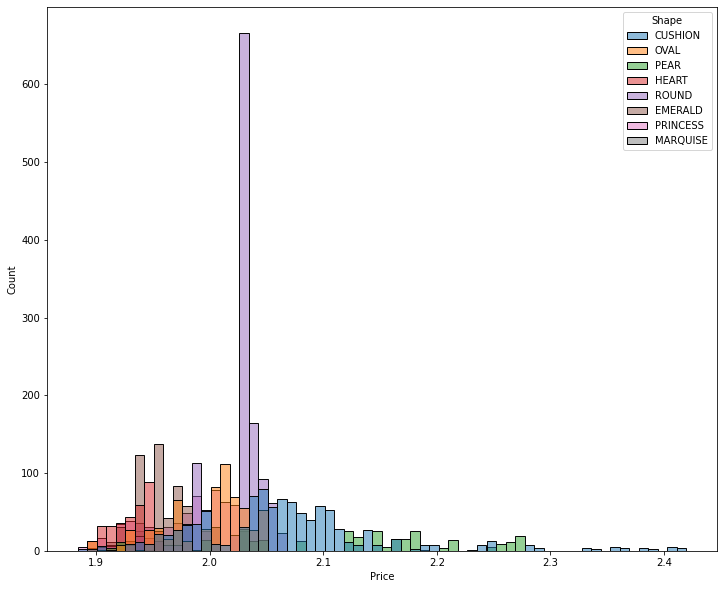

In [83]:
csv_log_price = csv
csv_log_price['Price'] = csv_log_price.Price.apply(np.log, axis = 1)

fig, axes = plt.subplots(figsize=(12, 10))

sns.histplot(x='Price', data=csv, hue = 'Shape')

로그를 이용해서 그린 그래프입니다.

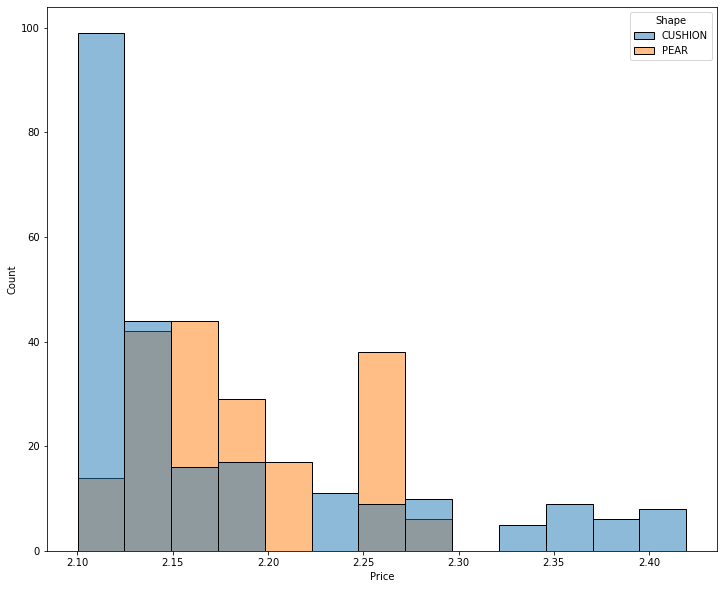

In [84]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.histplot(x='Price', data=csv[csv.Price > 2.1], hue = 'Shape')

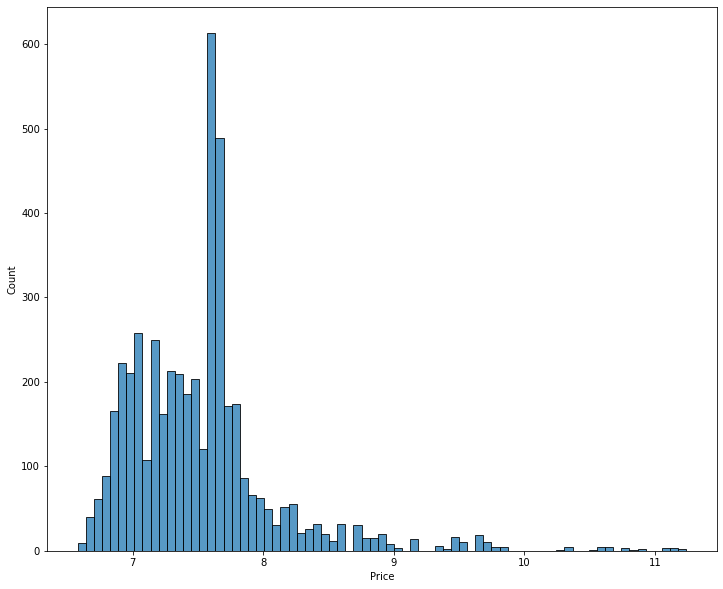

In [43]:
fig, axes = plt.subplots(figsize=(12, 10))

sns.histplot(x='Price', data=csv)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


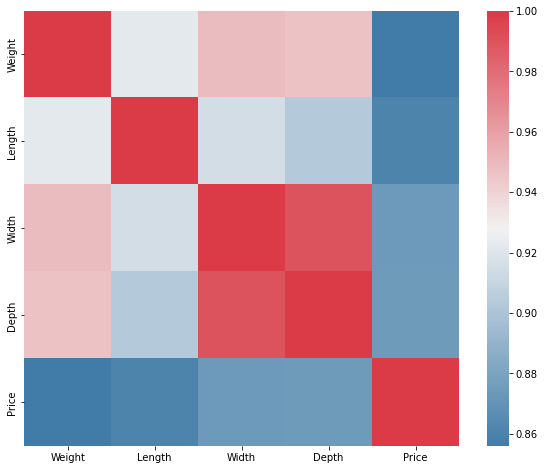

In [44]:
csv_heart = csv[csv.Shape == 'CUSHION']
f, ax = plt.subplots(figsize=(10, 8))
corr = csv_heart.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

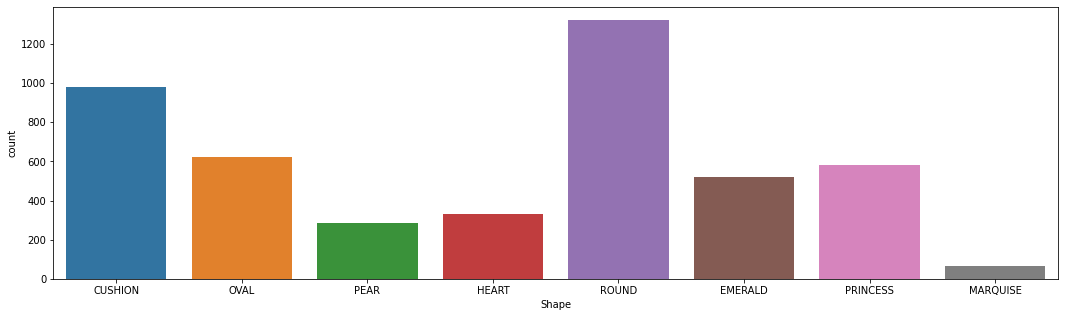

In [45]:
fig, axes = plt.subplots(figsize = (18,5))

sns.countplot(x = 'Shape', data = csv)

Text(0.5, 1.0, 'MARQUISE')

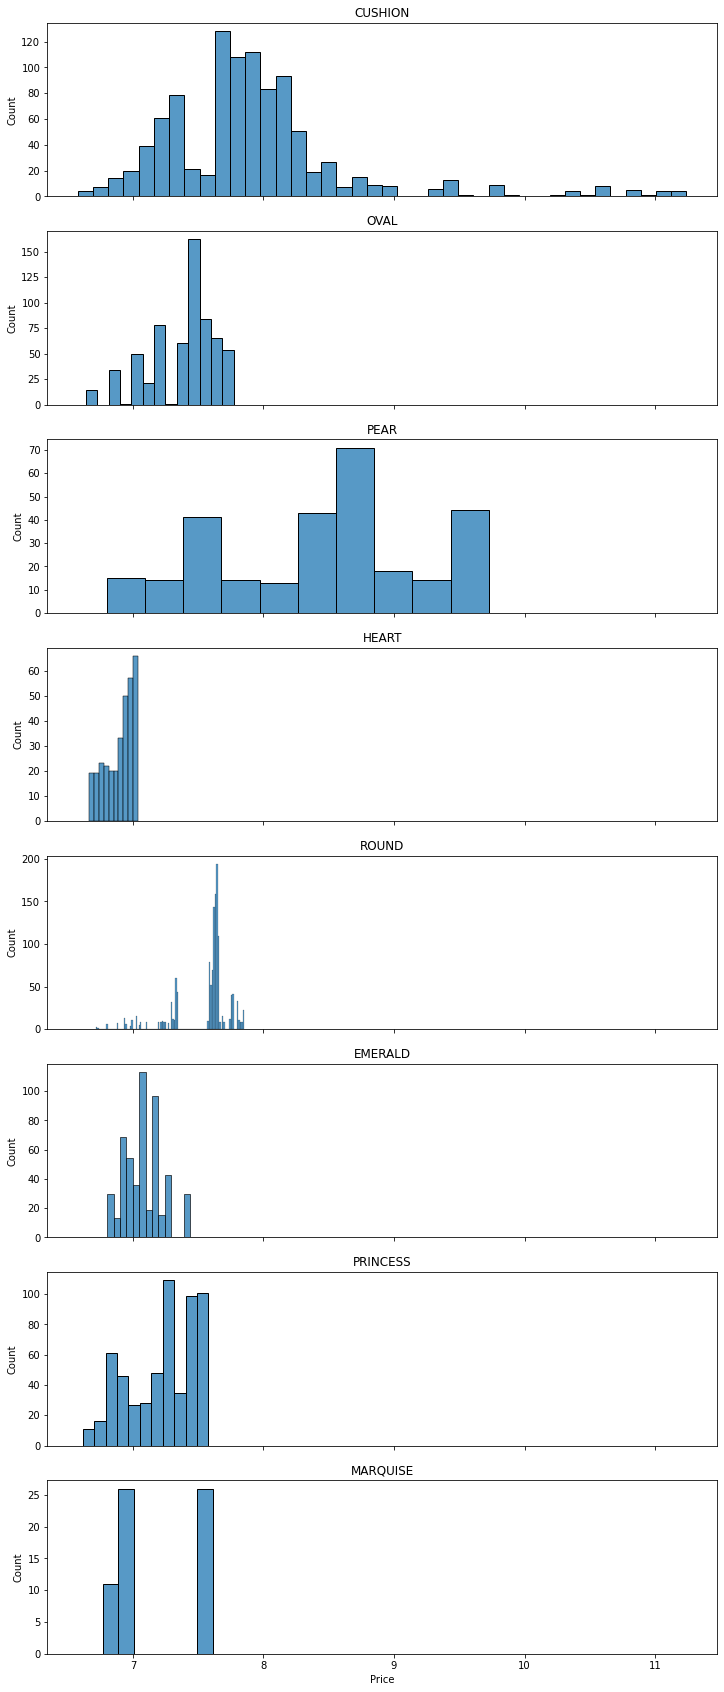

In [65]:
fig, axes = plt.subplots(8,1,figsize=(12, 30), sharex = True)

sns.histplot(x='Price', data=csv[csv.Shape == 'CUSHION'], ax = axes[0])
axes[0].set_title('CUSHION')
sns.histplot(x='Price', data=csv[csv.Shape == 'OVAL'], ax = axes[1])
axes[1].set_title('OVAL')
sns.histplot(x='Price', data=csv[csv.Shape == 'PEAR'], ax = axes[2])
axes[2].set_title('PEAR')
sns.histplot(x='Price', data=csv[csv.Shape == 'HEART'], ax = axes[3])
axes[3].set_title('HEART')
sns.histplot(x='Price', data=csv[csv.Shape == 'ROUND'], ax = axes[4])
axes[4].set_title('ROUND')
sns.histplot(x='Price', data=csv[csv.Shape == 'EMERALD'], ax = axes[5])
axes[5].set_title('EMERALD')
sns.histplot(x='Price', data=csv[csv.Shape == 'PRINCESS'], ax = axes[6])
axes[6].set_title('PRINCESS')
sns.histplot(x='Price', data=csv[csv.Shape == 'MARQUISE'], ax = axes[7])
axes[7].set_title('MARQUISE')